# <center> Trabajo 1
Nombre: Juan Licanqueo

El trabajo 1 consiste en usar los datos de la Biblia de Ávila, para identificar a cual de los 12 copistas corresponde cada texto transcrito.
Los datos los puede bajar desde: https://archive.ics.uci.edu/ml/datasets/Avila.

### Importamos las librerias .

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### Definimos el directorio de trabajo.

In [28]:
os.chdir('/Users/Juan/Desktop/trabajo_1/')
os.getcwd()

'C:\\Users\\Juan\\Desktop\\trabajo_1'

### Descargamos los datos desde UCI machine learning repository a nuestro directorio de trabajo y a continuación los cargamos con el siguiente codigo.

In [29]:
names = [
  'distancia_intercolumnar',
  'margen_superior',
  'margen_infeior',
  'explotacion',
  'numero_fila',
  'relacion_modular',
  'espaciado_interlinear',
  'peso',
  'numero_peak',
  'relacion_modular/espaciado_interlinear',
  'clase'
]

Avila_tr = pd.read_csv('avila-tr.txt', names=names)
Avila_ts = pd.read_csv('avila-ts.txt', names=names)

### Unimos los datos cargados y verificamos la dimensión del data frame definitivo.

In [30]:
Avila = pd.concat([Avila_tr,Avila_ts])
Avila.shape

(20867, 11)

In [31]:
Avila.columns

Index(['distancia_intercolumnar', 'margen_superior', 'margen_infeior',
       'explotacion', 'numero_fila', 'relacion_modular',
       'espaciado_interlinear', 'peso', 'numero_peak',
       'relacion_modular/espaciado_interlinear', 'clase'],
      dtype='object')

### Generamos un nuevo dataset sin la variable CLASE y observaremos su contenido como también un resumen estadístico.

In [32]:
Avila_Ind = Avila.iloc[:,0:10]
Avila_Ind.shape

(20867, 10)

In [33]:
Avila_Ind.head(4)

,distancia_intercolumnar,margen_superior,margen_infeior,explotacion,numero_fila,relacion_modular,espaciado_interlinear,peso,numero_peak,relacion_modular/espaciado_interlinear
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994


In [34]:
Avila_Ind.describe()

,distancia_intercolumnar,margen_superior,margen_infeior,explotacion,numero_fila,relacion_modular,espaciado_interlinear,peso,numero_peak,relacion_modular/espaciado_interlinear
count,2.086700e+04,20867.000000,20867.000000,20867.000000,2.086700e+04,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000
mean,-3.306656e-09,0.018498,0.002329,0.000115,5.697992e-08,0.002540,0.003977,0.000028,0.002108,0.000069
std,1.000007e+00,2.853117,1.058203,0.999997,9.999948e-01,1.065179,1.153325,1.000003,1.045362,1.000010
min,-3.498799e+00,-2.426761,-3.210528,-5.440122,-4.922215e+00,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-1.289290e-01,-0.259834,0.064919,-0.527256,1.723400e-01,-0.598658,-0.044076,-0.543914,-0.372457,-0.515235
50%,5.622900e-02,-0.055704,0.217845,0.089437,2.617180e-01,-0.058835,0.220177,0.108279,0.064084,-0.025918
75%,2.043550e-01,0.203385,0.352988,0.643738,2.617180e-01,0.564038,0.446679,0.648814,0.500624,0.528425
max,1.181992e+01,386.000000,50.000000,3.987152,1.066121e+00,53.000000,83.000000,13.173081,44.000000,11.911338


### A continuación crearemos otro dataset con los datos normalizados y volveremos a revisar el resumen estadístico.

In [35]:
from sklearn.preprocessing import normalize
Avila_Norm = pd.DataFrame(normalize(Avila_Ind))

In [36]:
Avila_Norm.describe()

,0,1,2,3,4,5,6,7,8,9
count,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000
mean,0.026293,-0.008988,0.066291,0.039891,0.082688,-0.003060,0.077018,0.034288,0.040016,0.002625
std,0.196215,0.232164,0.273432,0.386806,0.238734,0.371900,0.290322,0.391700,0.337517,0.337645
min,-0.773791,-0.975150,-0.978735,-0.951599,-0.958114,-0.761138,-0.929260,-0.943086,-0.955949,-0.770336
25%,-0.062643,-0.113949,0.027978,-0.241639,0.059409,-0.305264,-0.024521,-0.267246,-0.189805,-0.273086
50%,0.026402,-0.024424,0.103124,0.046911,0.129290,-0.026008,0.102011,0.052169,0.036897,-0.014730
75%,0.118851,0.097574,0.193436,0.352355,0.200732,0.293923,0.242931,0.336831,0.285447,0.278491
max,0.965640,0.991642,0.952973,0.957347,0.659020,0.867075,0.952959,0.933052,0.916834,0.756370


### Con los datos ya normalizados procederemos a conocer el número de clases, para ello aplicaremos el criterio del codo de k-means donde daremos un rango máximo de 15 clusters.

In [37]:
distortions = []
for i in range(1, 15):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(Avila_Norm)
    distortions.append(km.inertia_)

### Luego de haber generado el modelo pasaremos a visualizar la gráfica para ver con cuantos clusters nos quedaremos.

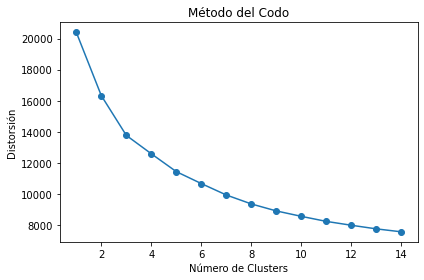

In [38]:
plt.plot(range(1, 15), distortions, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Distorsión')
plt.tight_layout()
plt.show()

### Según la gráfica nos quedan 4 clases ya que después se mantiene uniforme la caída de la distorsión.

### Pasaremos a verificar mediante el metodo del Discriminante Lineal cuantas clases nos quedan, pero antes reemplazaremos las clases por valores numéricos.

In [39]:
#Verificamos cuantas clases existen.
Avila.clase.unique()

array(['A', 'F', 'H', 'E', 'I', 'Y', 'D', 'X', 'G', 'W', 'C', 'B'],
      dtype=object)

In [40]:
#Crearemos un diccionario con los valores que deseamos reemplazar en cada clase.
Clase_Num = {'A':1, 'F':2, 'H':3, 'E':4, 'I':5, 'Y':6, 'D':7, 'X':8, 'G':9, 'W':10, 'C':11, 'B':12}
#--------------------------------------------------------------------------------------------------------
#Ahora generaremos un nuevo dataframe de nuestros datos con los datos numéricos.
Avila_Num = Avila.replace({'clase':Clase_Num})
#--------------------------------------------------------------------------------------------------------
#Finalmente verificamos si los clases fueron reemplazadas con exito.
Avila_Num.clase.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

### Luego del reemplazo de los valores de la variable clase separaremos los datos en variables independientes y dependiente.

In [41]:
# Definimos las variables independientes
#-----------------------------------------
x = Avila_Num.iloc[:,:10].values
x.shape

(20867, 10)

In [42]:
# Definimos la variable dependiente (clases)
#--------------------------------------------
y = Avila_Num.iloc[:,10].values
y.shape

(20867,)

### Ahora dividiremos nuestras variables en datos de entrenamiento y prueba para el modelo que utilicemos.

In [43]:
#Importaremos la clase train test split de la la librería sklearn para dividir los datos.
from sklearn.model_selection import train_test_split
#--------------------------------------------------------------------
#Particionamos los datos, con 75% para entrenar y 25% para prueba.
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y,
                                                   test_size = 0.25,
                                                   random_state = 0)

### A continuación pasaremos a escalar los datos independientes para estandarizar los valores y evitar que algunas variables predominen más sobre las demás.

In [44]:
#Importaremos la clase escalamiento estandar de la librería sklearn para realizar el escalonamiento 
#estandarizado de los datos.
from sklearn.preprocessing import StandardScaler
#---------------------------------------------------------------------------------------------
#Ahora instanciaremos la clase que nos transformara los datos.
SC_x = StandardScaler()
#----------------------------------------------------------------------------------------------
#En primer lugar ocuparemos los datos de entrenamiento de las variables independientes y 
#utilizaremos la función fit_transform para ajustar los datos y estandarizarlos, de esta forma 
#los datos se escalaran de forma automática y se obtendra la media y la varianza.
X_train = SC_x.fit_transform(X_train)
#-----------------------------------------------------------------------------------------------
#En segundo lugar escalaremos los datos de prueba de las variables independientes, para esto solo
#utilizaremos la función transform y asi podremos estandarizar los datos con la media y varianza 
#que se calculo anteriormente de forma automática.
X_test = SC_x.transform(X_test)

### El siguiente paso es aplicar LDA para realizar una reducción de dimensiones y de esta forma encontrar las variables idependientes que separen la gran mayoria de clases.

In [19]:
#Importaremos la clase de discriminante lineasl desde la librería sklearn para realizar la reducción
#de las dimensiones.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#---------------------------------------------------------------------------------------------------
#Ahora instanciaremos la clase en un objeto y definiremos el parametro donde especificaremos cuantas
#direcciones de separación máxima de nuestras clases.
lda = LDA(n_components = 4)
#---------------------------------------------------------------------------------------------------
#En primer lugar aplicaremos un fit_transform al conjunto de entrenamiento de las variables 
#dependientes y las clases que estan en la variable dependientes para buscar las direcciones que 
#separan lo máximo posible los datos de este conjunto.
X_train_lda = lda.fit_transform(X_train, y_train)
#----------------------------------------------------------------------------------------------------
#En segundo lugar aplicaremos transform al conjunto de prueba de las variables independientes
#con esto solo aplicaremos la transformación del espacio vectorial de los datos ya que las direcciones
#se encontraron anteriormente.
X_test_lda = lda.transform(X_test)
#-----------------------------------------------------------------------------------------------------
#De esta forma se paso de 10 variables independientes a variables 4 variables nuevas, lo que significa
#que X_train_lda tendra 4 columnas.

### Ahora pasaremos a generar el modelo de clasificación utlizando la Regresión Logística, el primer paso sera ajustar el modelo con los datos de entrenamiento que ya fueron transformados con LDA.

In [20]:
#Importaremos la clase de la regresión logística desde la librería sklearn para ajustar el modelo.
from sklearn.linear_model import LogisticRegression as LR
#------------------------------------------------------------------------------------------------
#A continuacion crearemos un objeto para instanciar la clase y definiremos una semilla, con esto
#generaremos el modelo de clasificación.
Cl_LR = LR(random_state = 0)
#------------------------------------------------------------------------------------------------
#El siguiente paso es ajustar el modelo de clasificación con la función fit utilizando los datos 
#de entrenamiento generaos en LDA de las variables independientes y el conjunto original de datos
#de la variable dependiente.
Cl_LR.fit(X_train_lda, y_train)

C:\Users\Juan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

### En este paso realizaremos la predicción de los resultados con el conjunto de prueba.

In [21]:
#Crearemos una variable donde guardaremos el vector con la predicciones de cada una de las 
#observaciones de los datos de prueba, para esto utilizaremos el conjunto de datos para prueba
#de las variables independientes creadas con LDA. 
y_pred_lda = Cl_LR.predict(X_test_lda)

### El paso siguiente sera reconocer las clases y verificar que tan bien predice el modelo, para esto ocuparemos la matriz de confusión.

<function matplotlib.pyplot.show(close=None, block=None)>

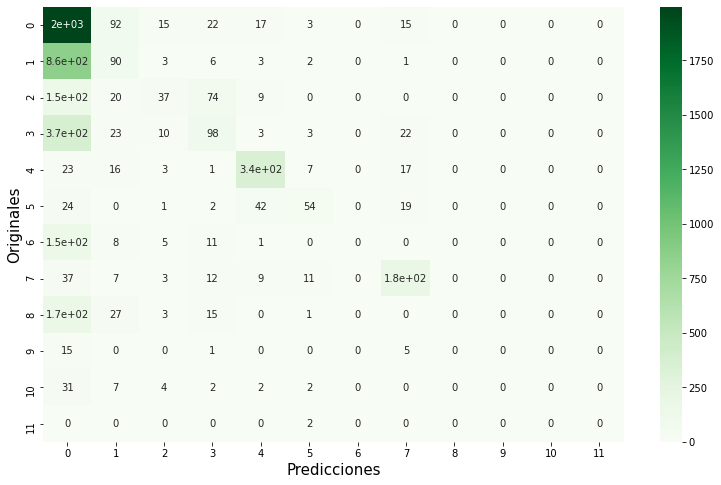

In [22]:
#Importaremos la clase de la matriz de confusión desde la librearía de sklearn.
from sklearn.metrics import confusion_matrix
#-------------------------------------------------------------------------------------------------
#A continuación crearemos una variable donde guardamos los resultados de la matriz de confusión,
#para eso utilizaremos el conjunto de datos de prueba original de la variable independiente y 
#la compararemos con los datos predichos.
Mat_Conf = confusion_matrix(y_test, y_pred_lda)
#--------------------------------------------------------------------------------------------------
#Finalmente visualizaremos la matriz de confusión para que tan bueno es nuestro modelo
plt.figure(figsize = (13,8))
sns.heatmap(Mat_Conf, 
            cmap = 'Greens',
           annot = True)
plt.xlabel('Predicciones',
          fontsize = 15)
plt.ylabel('Originales',
          fontsize = 15)
plt.show

### Observamos que el modelo no es bueno prediciendo y que las clases que menos error cometen son la 1, 5 y 8, en conclusión el método LDA no es bueno para separar todas las clases ya que 5 de ellas no las reconoce como se ve en la diagonal donde encontramos 0, debido a esto no es posible linealmente reconstruir las 12 clases con los datos demostrando que no son simetricos, finalmente el modelo solo reconoce 7 clases.

### Pasaremos a realizar la reducción de dimensiones mediante el método de Componente Principales (PCA). Aqui utilizaremos los datos escalados que se usaron en LDA.

In [23]:
#Importaremos la clase PCA de la librería sklearn para reducción de dimensiones.
from sklearn.decomposition import PCA
#--------------------------------------------------------------------------------------------
#A continuación crearemos un objeto para instanciar la clase, no definiremos la cantidad de 
#componentes ya que tomaremos el total para luego seleccionar las que explican el 80% de la
#varianza acumulada.
PCA_VAR = PCA(n_components = None)
#---------------------------------------------------------------------------------------------
#En primer lugar ocuparemos fit para calcular el ajuste de los parámetros y transform para aplicar
#esos parámetros utilizando el modelo creado al conjunto de datos de entrenamiento que fueron 
#escalado.
X_train_VAR = PCA_VAR.fit_transform(X_train)
#------------------------------------------------------------------------------------------------
#En segundo lugar aplicaremos las transformaciones realizadas anteriormente al conjunto de datos
#de prueba escalado utilizando solo transform y el modelo creado, el ajuste de los parámetros no 
#es necesario aplicar ya que eso fue calculado en el primer paso.
X_test_VAR = PCA_VAR.transform(X_test)
#------------------------------------------------------------------------------------------------
#Finalmente calcularemos la cantidad de varianza explicada por cada componente y de esa forma 
#poder seleccionar las componentes que explican el 80% de la varianza acumulada, de este cálculo
#saldrán 10 componentes ya que tenemos 10 variables independientes.
Var_Exp = PCA_VAR.explained_variance_ratio_
#------------------------------------------------------------------------------------------------
#Visualizaremos los 10 componentes principales y su varianza explicada de forma descendente
Var_Exp

array([0.26013842, 0.1619393 , 0.1522539 , 0.14250917, 0.08676385,
       0.05685856, 0.05060612, 0.04753766, 0.02994882, 0.01144421])

### De las 10 varianzas explicadas por cada componente encontramos que las 5 primeras son las que explican el 80,36% del total.

### Luego de haber encontrado las componentes principales que más explican la varianza, volveremos a crear otro objeto con la clase PCA pero ahora con el parámetro de componentes en 5.

In [45]:
#Primero crearemos un objeto para instanciar la clase incluyendo en el parámetro de componentes el 
#valor de 5.
PCA_5 = PCA(n_components = 5)
#--------------------------------------------------------------------------------------------------
#Segundo crearemos una variable donde guardaremos los datos de entrenamiento escalados los cuales
#ajustaremos los parámetros y a la vez aplicaremos esos ajustes con transform utilizando el modelo 
#anteriormente generado.
X_train_5 = PCA_5.fit_transform(X_train)
#---------------------------------------------------------------------------------------------------
#Y en tercer lugar aplicaremos las transformaciones hechas en el paso 2 al conjunto de datos de 
#prueba.
X_test_5 = PCA_5.transform(X_test)

### Ahora pasaremos a generar el modelo de clasificación utlizando la Regresión Logística, el primer paso sera ajustar el modelo con los datos de entrenamiento que ya fueron transformados con PCA.

In [46]:
#Importaremos la clase de la regresión logística desde la librería sklearn.
from sklearn.linear_model import LogisticRegression as LR
#------------------------------------------------------------------------------------------------
#A continuacion crearemos un objeto para instanciar la clase y definiremos una semilla, con esto
#generaremos el modelo de clasificación.
Cl_PCA = LR(random_state = 0)
#------------------------------------------------------------------------------------------------
#El siguiente paso es ajustar el modelo de clasificación con la función fit utilizando los datos 
#de entrenamiento generados en PCA de las variables independientes y el conjunto original de datos
#de la variable dependiente.
Cl_PCA.fit(X_train_5, y_train)

C:\Users\Juan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

### En este paso realizaremos la predicción de los resultados con el conjunto de prueba.

In [47]:
#Crearemos una variable donde guardaremos el vector con la predicciones de cada una de las 
#observaciones de los datos de prueba, para esto utilizaremos el conjunto de datos para prueba
#de las variables independientes creadas con PCA. 
y_pred_PCA = Cl_PCA.predict(X_test_5)

### El paso siguiente sera reconocer las clases y verificar que tan bien predice el modelo, para esto ocuparemos la matriz de confusión.

<function matplotlib.pyplot.show(close=None, block=None)>

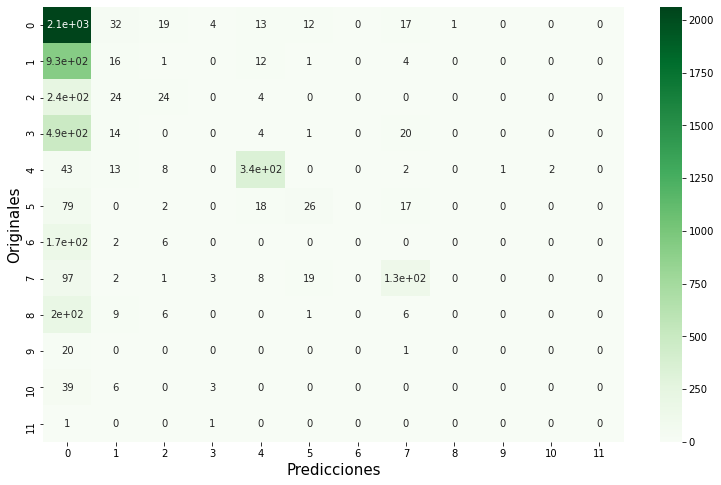

In [48]:
#Importaremos la clase de la matriz de confusión desde la librearía de sklearn.
from sklearn.metrics import confusion_matrix
#-------------------------------------------------------------------------------------------------
#A continuación crearemos una variable donde guardamos los resultados de la matriz de confusión,
#para eso utilizaremos el conjunto de datos de prueba original de la variable independiente y 
#la compararemos con los datos predichos.
Mat_Conf_PCA = confusion_matrix(y_test, y_pred_PCA)
#--------------------------------------------------------------------------------------------------
#Finalmente visualizaremos la matriz de confusión para que tan bueno es nuestro modelo
plt.figure(figsize = (13,8))
sns.heatmap(Mat_Conf_PCA, 
            cmap = 'Greens',
           annot = True)
plt.xlabel('Predicciones',
          fontsize = 15)
plt.ylabel('Originales',
          fontsize = 15)
plt.show

### Observamos que el modelo no es bueno prediciendo y que las clases que menos error cometen son la 1, 5 y 8, en conclusión el método PCA no es bueno para separar todas las clases ya que 6 de ellas no las reconoce como se ve en la diagonal donde encontramos 0, finalmente el modelo solo reconoce  6 clases.

### Luego de haber encontrado las componentes principales que más explican la varianza, volveremos a crear otro objeto con la clase PCA pero ahora con el parámetro de componentes en 2 para poder graficar.

In [49]:
#Primero crearemos un objeto para instanciar la clase incluyendo en el parámetro de componentes el 
#valor de 2.
PCA_2 = PCA(n_components = 2)
#--------------------------------------------------------------------------------------------------
#Segundo crearemos una variable donde guardaremos los datos de entrenamiento escalados los cuales
#ajustaremos los parámetros y a la vez aplicaremos esos ajustes con transform utilizando el modelo 
#anteriormente generado.
X_train_2 = PCA_2.fit_transform(X_train)
#---------------------------------------------------------------------------------------------------
#Y en tercer lugar aplicaremos las transformaciones hechas en el paso 2 al conjunto de datos de 
#prueba.
X_test_2 = PCA_2.transform(X_test)

### Ahora pasaremos a generar el modelo de clasificación utlizando la Regresión Logística, el primer paso sera ajustar el modelo con los datos de entrenamiento que ya fueron transformados con PCA.

In [50]:
#Importaremos la clase de la regresión logística desde la librería sklearn.
from sklearn.linear_model import LogisticRegression as LR
#------------------------------------------------------------------------------------------------
#A continuacion crearemos un objeto para instanciar la clase y definiremos una semilla, con esto
#generaremos el modelo de clasificación.
Cl_PCA_2 = LR(random_state = 0)
#------------------------------------------------------------------------------------------------
#El siguiente paso es ajustar el modelo de clasificación con la función fit utilizando los datos 
#de entrenamiento generados en PCA de las variables independientes y el conjunto original de datos
#de la variable dependiente.
Cl_PCA_2.fit(X_train_2, y_train)

LogisticRegression(random_state=0)

### En este paso realizaremos la predicción de los resultados con el conjunto de prueba.

In [51]:
#Crearemos una variable donde guardaremos el vector con la predicciones de cada una de las 
#observaciones de los datos de prueba, para esto utilizaremos el conjunto de datos para prueba
#de las variables independientes creadas con PCA. 
y_pred_PCA_2 = Cl_PCA_2.predict(X_test_2)

### Vamos a generar una represetación gráfica de los resultados obtenidos en el conjunto de entrenamiento.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

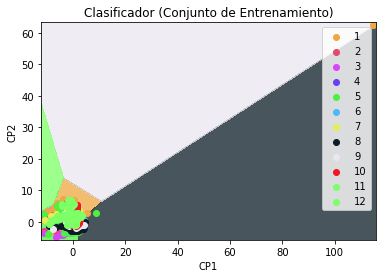

In [55]:
# Representación gráfica de los resultados del algoritmo en el Conjunto de Entrenamiento
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_2, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, Cl_PCA_2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#F0A741', '#E3496A', '#DA43FA','#6741F0','#4EF041','#4EB9FA','#E1F056', '#0C1C26', '#EAE7F0','#F01822','#7DFF66')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('#F0A741', '#E3496A', '#DA43FA','#6741F0','#4EF041','#4EB9FA','#E1F056', '#0C1C26', '#EAE7F0','#F01822','#7DFF66'))(i), label = j)
plt.title('Clasificador (Conjunto de Entrenamiento)')
plt.xlabel('CP1')
plt.ylabel('CP2')
plt.legend()
plt.show()

### Observamos en la gráfica que el modelo no es bueno separando la variables, lo que nos indica que linealmente no es posible reconstruir las 12 clases.

### Ahora vamos a generar una represetación gráfica de los resultados obtenidos en el conjunto prueba.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

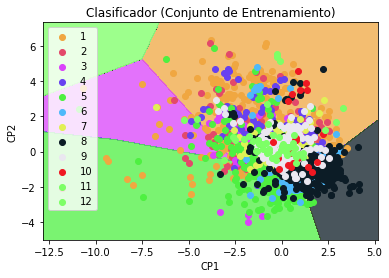

In [56]:
# Representación gráfica de los resultados del algoritmo en el Conjunto de Prueba.
X_set, y_set = X_test_2, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, Cl_PCA_2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#F0A741', '#E3496A', '#DA43FA','#6741F0','#4EF041','#4EB9FA','#E1F056', '#0C1C26', '#EAE7F0','#F01822','#7DFF66')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('#F0A741', '#E3496A', '#DA43FA','#6741F0','#4EF041','#4EB9FA','#E1F056', '#0C1C26', '#EAE7F0','#F01822','#7DFF66'))(i), label = j)
plt.title('Clasificador (Conjunto de Entrenamiento)')
plt.xlabel('CP1')
plt.ylabel('CP2')
plt.legend()
plt.show()

### Observamos en la gráfica que el modelo no es bueno separando la variables, lo que nos indica que linealmente no es posible reconstruir las 12 clases.

### Volveremos a crear otro objeto pero ahora utilizaremos la clase Kernel PCA para reducir la dimensión de forma no lineal, con el parámetro de componentes en 2 para poder graficar.

In [58]:
#Importaremos la clase Kernel PCA de la librería sklearn para reducción de dimensiones.
from sklearn.decomposition import KernelPCA
#Primero crearemos un objeto para instanciar la clase incluyendo en el parámetro de componentes el 
#valor de 2.
KPCA_2 = KernelPCA(n_components = 2, kernel = 'rbf')
#--------------------------------------------------------------------------------------------------
#Segundo crearemos una variable donde guardaremos los datos de entrenamiento escalados los cuales
#ajustaremos los parámetros y a la vez aplicaremos esos ajustes con transform utilizando el modelo 
#anteriormente generado.
X_train_K2 = KPCA_2.fit_transform(X_train)
#---------------------------------------------------------------------------------------------------
#Y en tercer lugar aplicaremos las transformaciones hechas en el paso 2 al conjunto de datos de 
#prueba.
X_test_K2 = KPCA_2.transform(X_test)

### Ahora pasaremos a generar el modelo de clasificación utlizando la Regresión Logística, el primer paso sera ajustar el modelo con los datos de entrenamiento que ya fueron transformados con Kernel PCA.

In [59]:
#Importaremos la clase de la regresión logística desde la librería sklearn.
from sklearn.linear_model import LogisticRegression as LR
#------------------------------------------------------------------------------------------------
#A continuacion crearemos un objeto para instanciar la clase y definiremos una semilla, con esto
#generaremos el modelo de clasificación.
Cl_KPCA_2 = LR(random_state = 0)
#------------------------------------------------------------------------------------------------
#El siguiente paso es ajustar el modelo de clasificación con la función fit utilizando los datos 
#de entrenamiento generados en PCA de las variables independientes y el conjunto original de datos
#de la variable dependiente.
Cl_KPCA_2.fit(X_train_K2, y_train)

C:\Users\Juan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

### En este paso realizaremos la predicción de los resultados con el conjunto de prueba.

In [60]:
#Crearemos una variable donde guardaremos el vector con la predicciones de cada una de las 
#observaciones de los datos de prueba, para esto utilizaremos el conjunto de datos para prueba
#de las variables independientes creadas con PCA. 
y_pred_KPCA_2 = Cl_KPCA_2.predict(X_test_K2)

### Ahora vamos a generar una represetación gráfica de los resultados obtenidos en el conjunto de entrenamiento.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

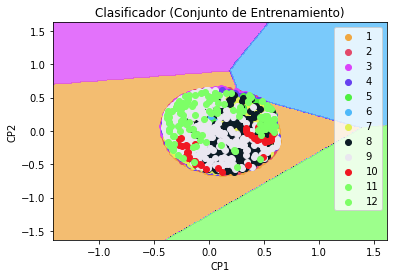

In [61]:
# Representación gráfica de los resultados del algoritmo en el Conjunto de Entrenamiento
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_K2, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, Cl_KPCA_2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#F0A741', '#E3496A', '#DA43FA','#6741F0','#4EF041','#4EB9FA','#E1F056', '#0C1C26', '#EAE7F0','#F01822','#7DFF66')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('#F0A741', '#E3496A', '#DA43FA','#6741F0','#4EF041','#4EB9FA','#E1F056', '#0C1C26', '#EAE7F0','#F01822','#7DFF66'))(i), label = j)
plt.title('Clasificador (Conjunto de Entrenamiento)')
plt.xlabel('CP1')
plt.ylabel('CP2')
plt.legend()
plt.show()

### Observamos en la gráfica que el modelo no es bueno separando la variables, lo que nos indica que tampoco es posible reconstruir las 12 clases de forma no lineal.

### Ahora vamos a generar una represetación gráfica de los resultados obtenidos en el conjunto prueba.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

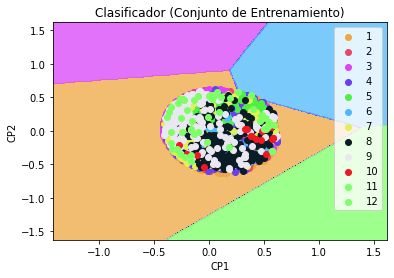

In [62]:
# Representación gráfica de los resultados del algoritmo en el Conjunto de Prueba.
X_set, y_set = X_test_K2, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, Cl_KPCA_2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#F0A741', '#E3496A', '#DA43FA','#6741F0','#4EF041','#4EB9FA','#E1F056', '#0C1C26', '#EAE7F0','#F01822','#7DFF66')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('#F0A741', '#E3496A', '#DA43FA','#6741F0','#4EF041','#4EB9FA','#E1F056', '#0C1C26', '#EAE7F0','#F01822','#7DFF66'))(i), label = j)
plt.title('Clasificador (Conjunto de Entrenamiento)')
plt.xlabel('CP1')
plt.ylabel('CP2')
plt.legend()
plt.show()

### Observamos en la gráfica que el modelo no es bueno separando la variables, lo que nos indica que tampoco es posible reconstruir las 12 clases de forma no lineal.